In [1]:
import numpy as np

In [2]:
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

In [3]:
video.size

4

In [4]:
video[2]

3.25

In [5]:
import matplotlib.pyplot as plt

In [6]:
u = np.array([2, 5])
v = np.array([3, 1])

In [7]:
x_coords, y_coords = zip(u, v)

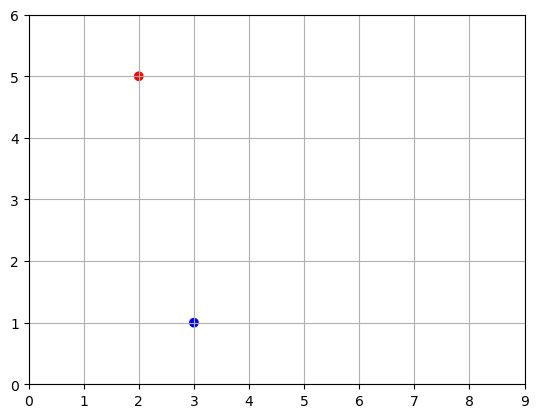

In [8]:
plt.scatter(x_coords, y_coords, color=['r', 'b'])
plt.axis([0, 9, 0, 6])
plt.grid()

In [9]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                     head_width=0.2, head_length=0.3, length_includes_head=True,
                     **options)

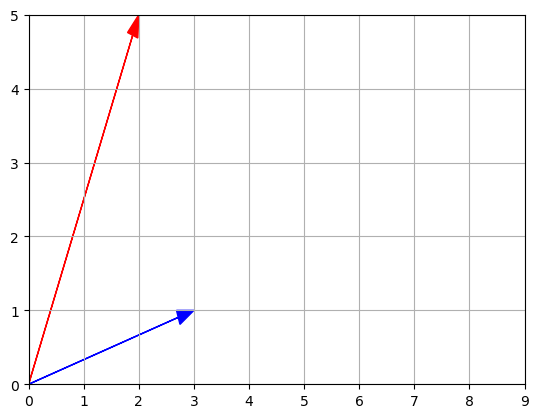

In [10]:
plot_vector2d(u, color='r')
plot_vector2d(v, color='b')
plt.axis([0, 9, 0, 5])
plt.grid()

In [11]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

In [12]:
from mpl_toolkits.mplot3d import Axes3D

(0.0, 9.0)

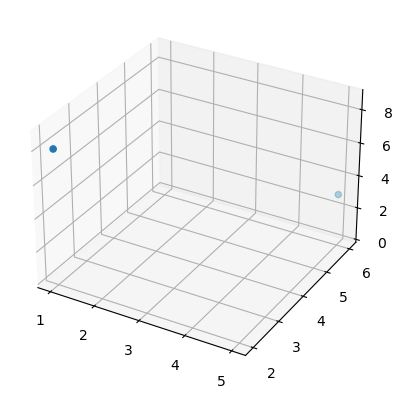

In [13]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a, b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])

In [14]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x, x], [y, y], [z0, z], color='gray', linestyle='dotted', marker='.')
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

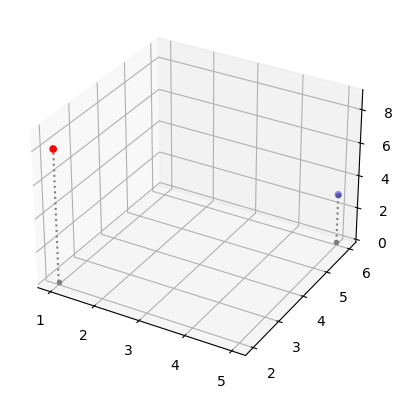

In [15]:
subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a, b], 0, color=('r', 'b'))

정규화

In [16]:
def vector_norm(vector):
    squares = [element ** 2 for element in vector]
    return sum(squares) ** 0.5

In [17]:
vector_norm(u)

5.385164807134504

In [18]:
import numpy.linalg as LA

LA.norm(u)

5.385164807134504

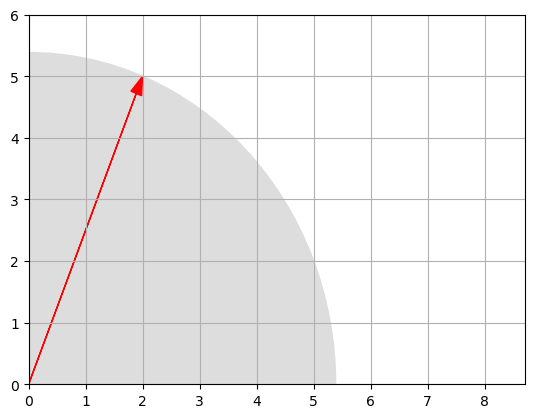

In [19]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0, 0), radius, color='#DDDDDD'))
plot_vector2d(u, color='r')
plt.axis([0, 8.7, 0, 6])
plt.grid()

### Addition

In [20]:
print(' ', u)
print('+', v)
print('-' * 10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Text(3.1, 5.6, 'v')

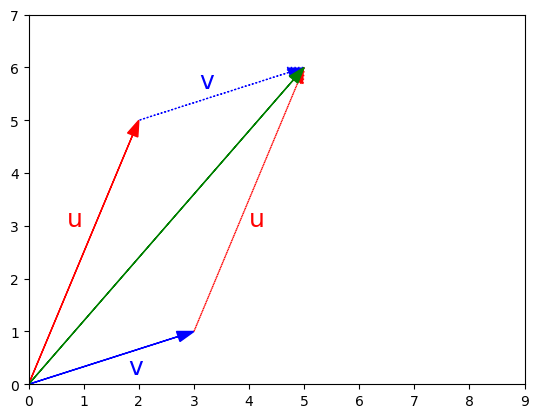

In [21]:
plot_vector2d(u, color='r')
plot_vector2d(v, color='b')
plot_vector2d(v, origin=u, color='b', linestyle='dotted')
plot_vector2d(u, origin=v, color='r', linestyle='dotted')
plot_vector2d(u + v, color='g')
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, 'u', color='r', fontsize=18)
plt.text(4, 3, 'u', color='r', fontsize=18)
plt.text(1.8, 0.2, 'v', color='b', fontsize=18)
plt.text(3.1, 5.6, 'v', color='b', fontsize=18)

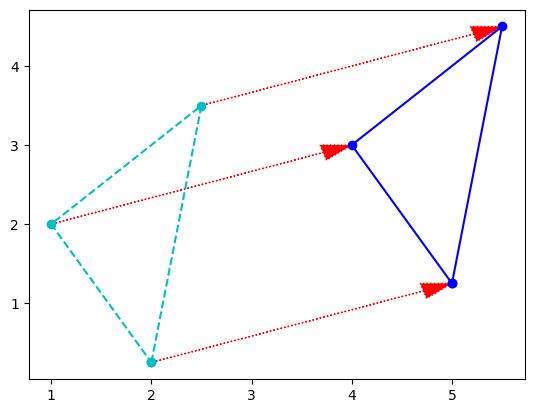

In [22]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, 'c--', x_coords, y_coords, 'co')

plot_vector2d(v, t1, color='r', linestyle=':')
plot_vector2d(v, t2, color='r', linestyle=':')
plot_vector2d(v, t3, color='r', linestyle=':')

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, 'b-', x_coords_b, y_coords_b, 'bo')


### Multipliecation by a scalar

In [23]:
print('1.5 *', u, '=')
1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

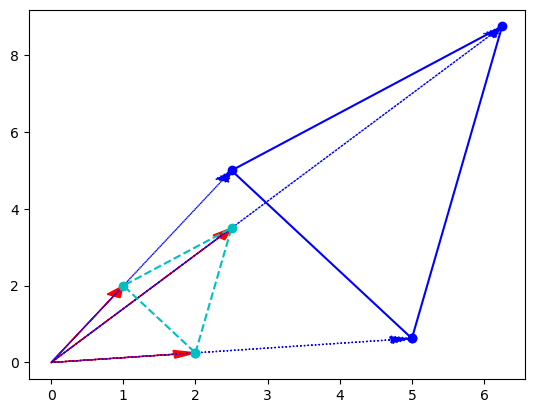

In [24]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, 'c--', x_coords, y_coords, 'co')

plot_vector2d(t1, color='r')
plot_vector2d(t2, color='r')
plot_vector2d(t3, color='r')

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, 'b-', x_coords_c, y_coords_c, 'bo')

plot_vector2d(k * t1, color='b', linestyle=':')
plot_vector2d(k * t2, color='b', linestyle=':')
plot_vector2d(k * t3, color='b', linestyle=':')

### Zero, unit and normalized vectors

(-1.5, 5.5, -1.5, 3.5)

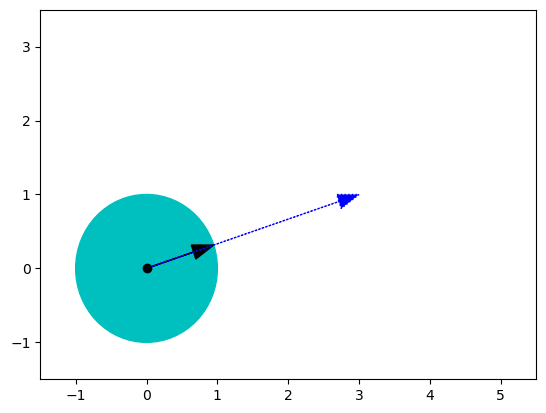

In [25]:
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))
plt.plot(0, 0, 'ko')
plot_vector2d(v / LA.norm(v), color='k')
plot_vector2d(v, color='b', linestyle=':')

plt.axis([-1.5, 5.5, -1.5, 3.5])

## Dot product

In [26]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))


dot_product(u, v)

11

In [27]:
np.dot(u, v)

11

In [28]:
u.dot(v)

11

In [29]:
u * v

array([6, 5])

### Calculating the angle between vectors

In [30]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

In [31]:
theta = vector_angle(u, v)
print(theta)
print(theta * 180 / np.pi)

0.8685393952858895
49.76364169072618


### Projecting a point onto an axis

(0.0, 8.0, 0.0, 5.5)

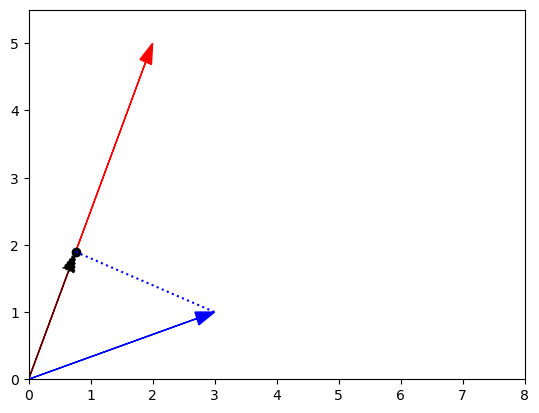

In [32]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color='r')
plot_vector2d(v, color='b')

plot_vector2d(proj, color='k', linestyle=':')
plt.plot(proj[0], proj[1], 'ko')

plt.plot([proj[0], v[0]], [proj[1], v[1]], 'b:')

plt.axis([0, 8, 0, 5.5])

## Matrices

In [33]:
A = np.array([
    [10, 20, 30],
    [40, 50, 60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

In [34]:
A.shape

(2, 3)

In [35]:
A.size

6

In [36]:
A[1, 2]

60

In [37]:
A[1, :]

array([40, 50, 60])

In [38]:
A[:, 2]

array([30, 60])

In [39]:
A[1:2, :]

array([[40, 50, 60]])

In [40]:
A[:, 2:3]

array([[30],
       [60]])

In [41]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

In [42]:
D = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
np.diag(D)

array([1, 5, 9])

In [43]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [44]:
B = np.array([[1, 2, 3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [46]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

In [47]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

In [48]:
D = np.array([
    [2, 3, 5, 7],
    [11, 13, 17, 19],
    [23, 29, 31, 37]
])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

In [49]:
try:
    D.dot(A)
except ValueError as e:
    print('ValueError:', e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


In [50]:
F = np.array([
    [5,2],
    [4,1],
    [9,3]
])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [51]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

In [52]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G) == (A.dot(D.dot(G)))

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [53]:
(A + B).dot(D) == A.dot(D) + B.dot(D)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [54]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [55]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

In [56]:
A * B

array([[ 10,  40,  90],
       [160, 250, 360]])

In [57]:
A @ D

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

In [58]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [59]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

In [60]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

In [61]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [62]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [63]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [64]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [65]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

### Converting 1D arrays to 2D arrays in Numpy

In [66]:
u

array([2, 5])

In [67]:
u.T

array([2, 5])

In [68]:
u_row = np.array([u])
u_row

array([[2, 5]])

In [69]:
u[np.newaxis, :]

array([[2, 5]])

In [70]:
u[np.newaxis]

array([[2, 5]])

In [71]:
u[None]

array([[2, 5]])

In [72]:
u_row.T

array([[2],
       [5]])

In [73]:
u[:, np.newaxis]

array([[2],
       [5]])

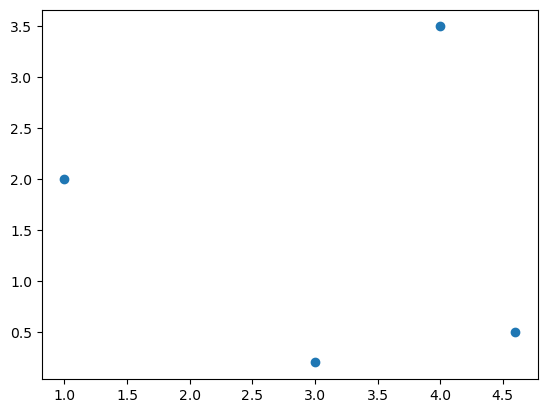

In [74]:
P = np.array([
    [3.0, 4.0, 1.0, 4.6],
    [0.2, 3.5, 2.0, 0.5]
])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)

(0.0, 5.0, 0.0, 4.0)

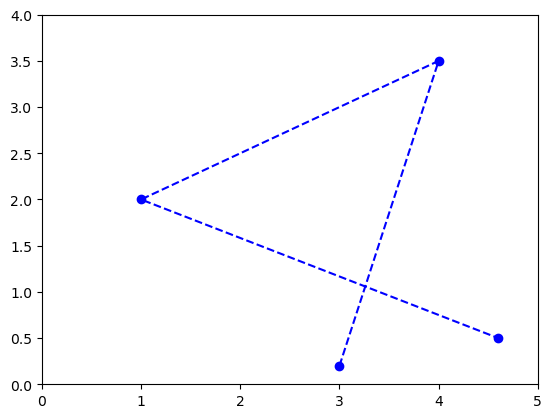

In [75]:
plt.plot(x_coords_P, y_coords_P, 'bo')
plt.plot(x_coords_P, y_coords_P, 'b--')
plt.axis([0, 5, 0, 4])

(0.0, 5.0, 0.0, 4.0)

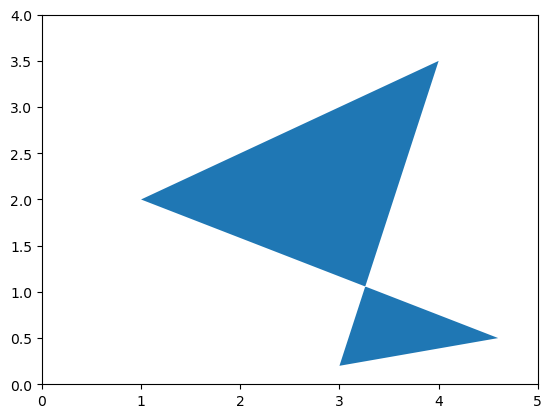

In [76]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])

(0.0, 5.0, 0.0, 4.0)

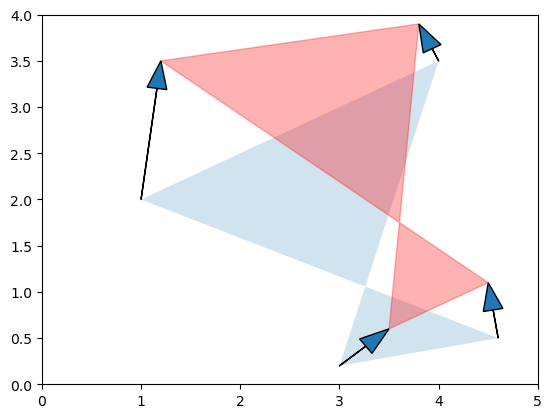

In [77]:
H = np.array([
    [0.5, -0.2, 0.2, -0.1],
    [0.4, 0.4, 1.5, 0.6]
])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color='r'))

for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin)

plt.axis([0, 5, 0, 4])

(0.0, 5.0, 0.0, 4.0)

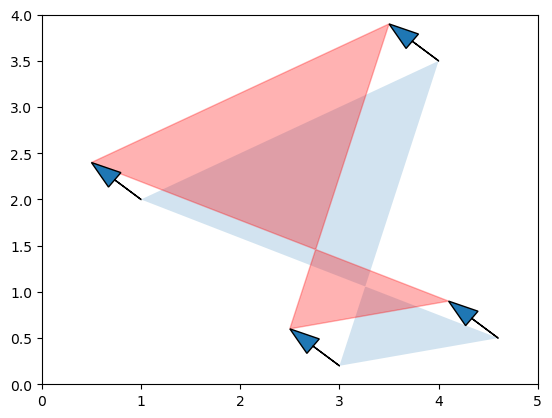

In [78]:
H2 = np.array([
    [-0.5, -0.5, -0.5, -0.5],
    [0.4, 0.4, 0.4, 0.4]
])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color='r'))

for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin)

plt.axis([0, 5, 0, 4])

In [79]:
P + [[-0.5], [0.4]]

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

In [80]:
def plot_transformation(P_before, P_after, text_before, text_after, axis=[0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color='blue', linestyle='--')
            plot_vector2d(vector_after, color='red', linestyle='-')
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color='r'))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color='blue')
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color='r')
    plt.axis(axis)
    plt.grid()

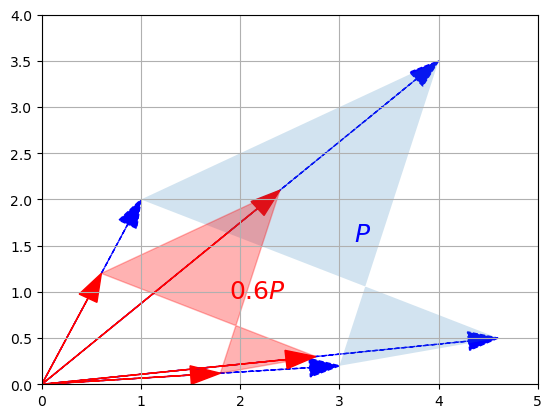

In [81]:
P_rescaled = 0.6 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)

### Matrix multiplication - Projection onto an axis

In [82]:
U = np.array([[1, 0]])

In [83]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

In [84]:
def plot_projection(U, P):
    U_P = U.dot(P)

    axis_end = 100 * U
    plot_vector2d(axis_end[0], color='black')

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        print(vector, proj_coordinate)
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], 'ro')
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], 'r--')

    plt.axis([0, 5, 0, 4])
    plt.grid()

[3.  0.2] [3.]
[4.  3.5] [4.]
[1. 2.] [1.]
[4.6 0.5] [4.6]


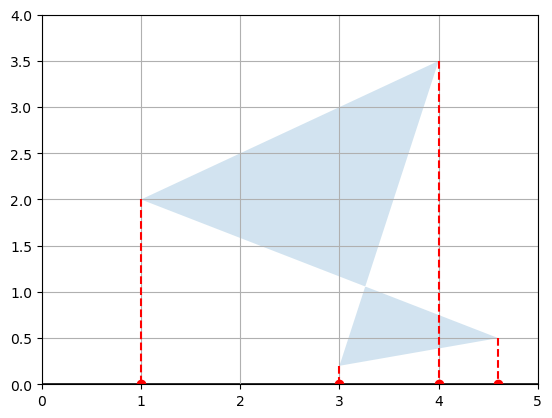

In [85]:
plot_projection(U, P)

[3.  0.2] [2.69807621]
[4.  3.5] [5.21410162]
[1. 2.] [1.8660254]
[4.6 0.5] [4.23371686]


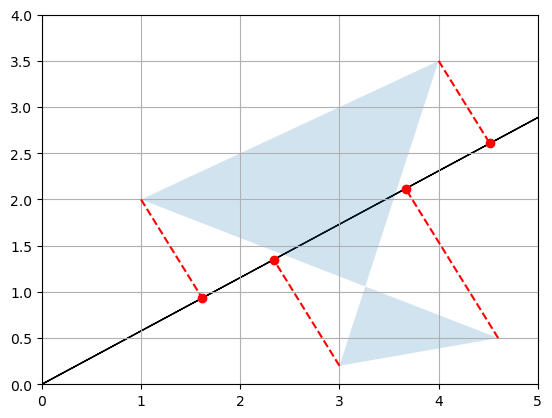

In [86]:
angle30 = 30 * np.pi / 180
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])
plot_projection(U_30, P)

In [87]:
angle120 = 120 * np.pi / 180
V = np.array([
    [np.cos(angle30), np.sin(angle30)],
    [np.cos(angle120), np.sin(angle120)]
])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [88]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

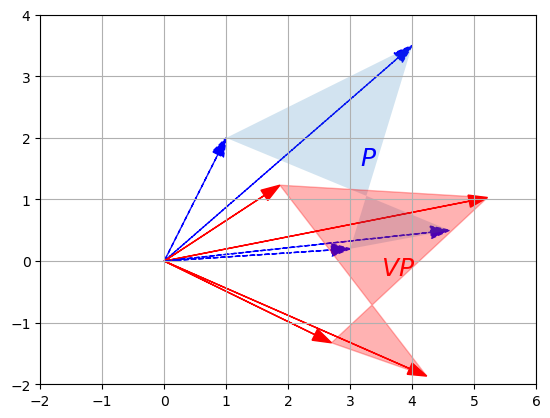

In [89]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, '$P$', '$VP$', [-2, 6, -2, 4], arrows=True)

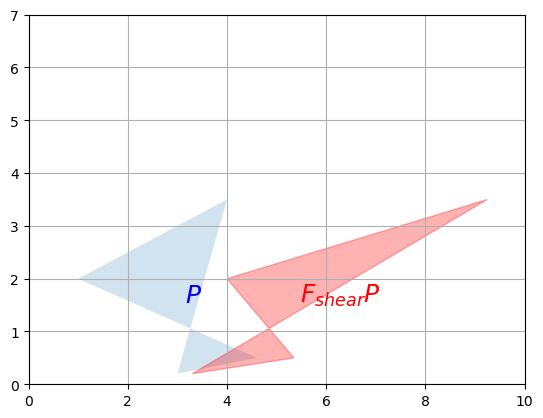

In [90]:
F_shear = np.array([
    [1, 1.5],
    [0, 1]
])
plot_transformation(P, F_shear.dot(P), '$P$', '$F_{shear} P$', axis=[0, 10, 0, 7])

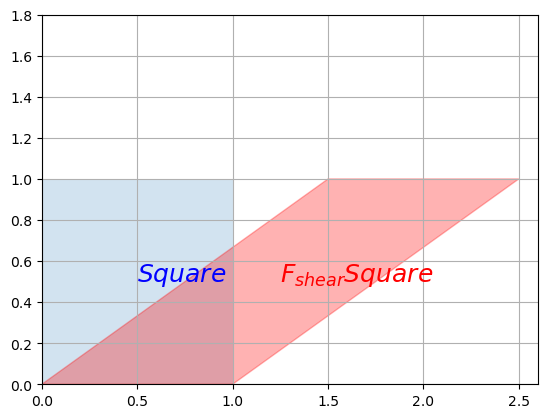

In [91]:
Square = np.array([
    [0, 0, 1, 1],
    [0, 1, 1, 0]
])
plot_transformation(Square, F_shear.dot(Square), '$Square$', '$F_{shear} Square$', axis=[0, 2.6, 0, 1.8])

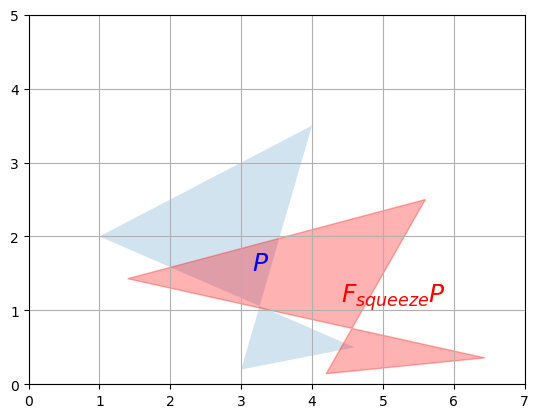

In [92]:
F_squeeze = np.array([
    [1.4, 0],
    [0, 1/1.4]
])
plot_transformation(P, F_squeeze.dot(P), '$P$', '$F_{squeeze} P$', axis=[0, 7, 0, 5])

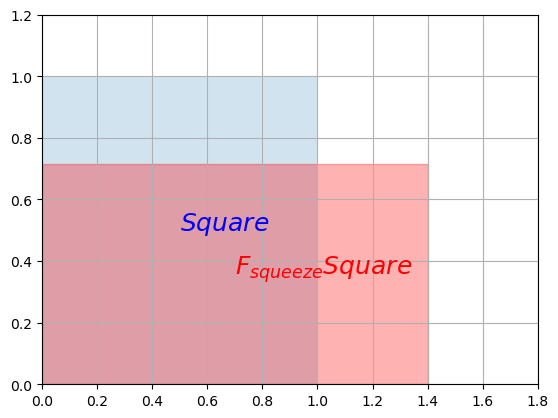

In [93]:
plot_transformation(Square, F_squeeze.dot(Square), "$Square$", "$F_{squeeze} Square$", axis=[0, 1.8, 0, 1.2])

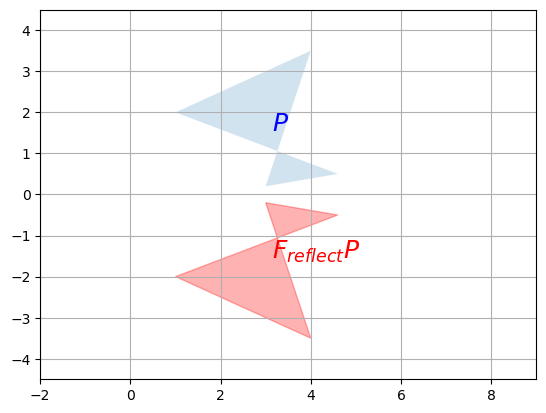

In [94]:
F_reflect = np.array([
    [1, 0],
    [0, -1]
])
plot_transformation(P, F_reflect.dot(P), '$P$', '$F_{reflect} P$', axis=[-2, 9, -4.5, 4.5])

### 역행렬

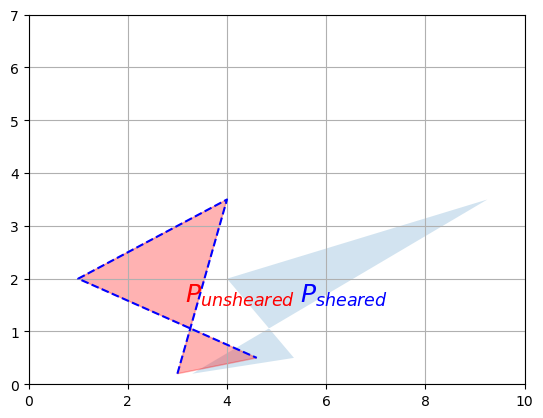

In [95]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, '$P_{sheared}$', '$P_{unsheared}$', axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], 'b--')

In [96]:
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

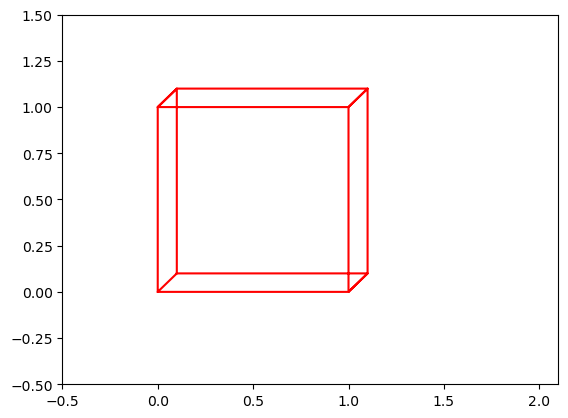

In [97]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()

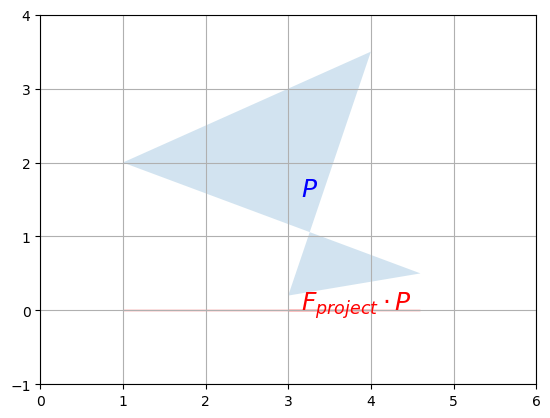

In [98]:
F_project = np.array([
    [1, 0],
    [0, 0]
])
plot_transformation(P, F_project.dot(P), '$P$', '$F_{project} \cdot P$', axis=[0, 6, -1, 4])

In [99]:
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print('LinAlgError:', e)

LinAlgError: Singular matrix


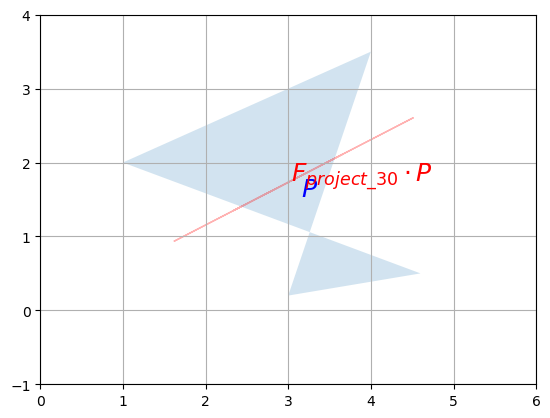

In [100]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
    [np.cos(angle30) ** 2, np.sin(2 * angle30) / 2],
    [np.sin(2 * angle30) / 2, np.sin(angle30) ** 2]
])
plot_transformation(P, F_project_30.dot(P), '$P$', '$F_{project\_30} \cdot P$', axis=[0, 6, -1, 4])

In [101]:
LA.inv(F_project_30)

array([[ 1.54810441e+16, -2.68139549e+16],
       [-2.68139549e+16,  4.64431323e+16]])

In [102]:
F_shear.dot(LA.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

In [103]:
LA.inv(LA.inv(F_shear))

array([[1. , 1.5],
       [0. , 1. ]])

In [104]:
F_involution = np.array([
    [0, -2],
    [-1/2, 0]
])
LA.inv(F_involution)

array([[-0. , -2. ],
       [-0.5, -0. ]])

In [105]:
F_reflect.dot(F_reflect.T)

array([[1, 0],
       [0, 1]])

In [106]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
])
LA.det(M)

27.0

In [107]:
LA.det(F_project)

0.0

In [108]:
LA.det(F_project_30)

1.6148781609251353e-17

In [109]:
LA.det(F_shear)

1.0

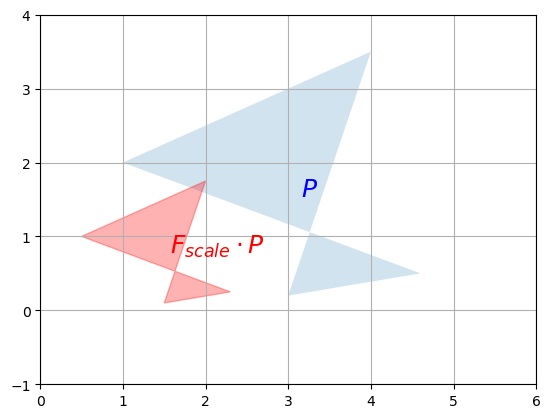

In [110]:
F_scale = np.array([
    [0.5, 0],
    [0, 0.5]
])
plot_transformation(P, F_scale.dot(P), '$P$', '$F_{scale} \cdot P$', axis=[0, 6, -1, 4])

In [111]:
LA.det(F_scale)

0.25

In [112]:
LA.det(F_reflect)

-1.0

In [114]:
P_squeezed_then_sheared = F_shear.dot(F_squeeze.dot(P))
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

In [116]:
P_squeezed_then_sheared = (F_shear.dot(F_squeeze)).dot(P)
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

In [117]:
LA.inv(F_shear.dot(F_squeeze)) == LA.inv(F_squeeze).dot(LA.inv(F_shear))

array([[ True,  True],
       [ True,  True]])

In [118]:
U, S_diag, V_T = LA.svd(F_shear)
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [119]:
S_diag

array([2. , 0.5])

In [120]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

In [121]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

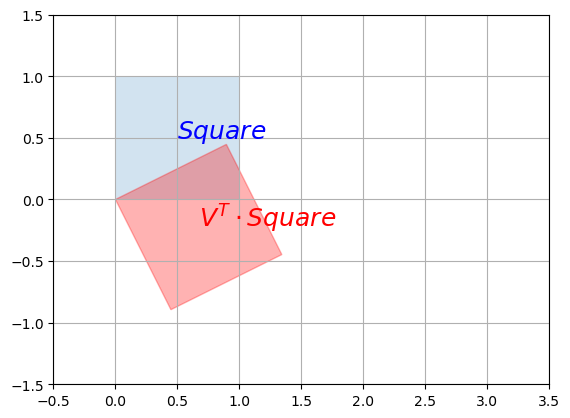

In [122]:
plot_transformation(Square, V_T.dot(Square), '$Square$', '$V^T \cdot Square$', axis=[-0.5, 3.5, -1.5, 1.5])

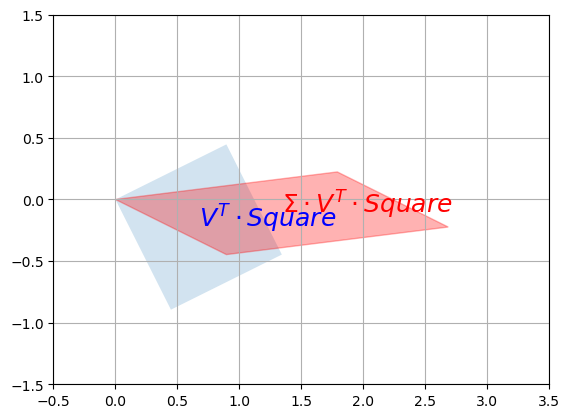

In [125]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), '$V^T \cdot Square$', '$\Sigma \cdot V^T \cdot Square$', axis=[-0.5, 3.5, -1.5, 1.5])

### Eigenvectors and eigenvalues

In [126]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)

In [127]:
eigenvalues

array([1.4       , 0.71428571])

In [128]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

In [129]:
eigenvalues2, eigenvectors2 = LA.eig(F_shear)

In [130]:
eigenvalues2

array([1., 1.])

In [131]:
eigenvectors2

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

### Trace

In [132]:
D = np.array([
    [100, 200, 300],
    [10, 20, 30],
    [1, 2, 3]
])
np.trace(D)

123

In [133]:
np.trace(F_project)

1